Predict Wine Quality Akshay
-----------------

This is just a text 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from patsy import dmatrices
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [13]:
df_w = pd.read_csv("winequality-white.csv", delimiter = ";")
df_r = pd.read_csv("winequality-red.csv", delimiter = ";")

#Drop duplicates 
df_w.drop_duplicates(inplace=True)
df_r.drop_duplicates(inplace=True)

In [14]:
#Create a categorical column to determine the wine type
df_w['Type'] = "W"
df_r["Type"] = "R"

In [15]:
col_list = list(df_w.columns.values)
#Concat both dataframes
df = pd.concat([df_w, df_r])

In [16]:
wine = df.copy()

Data Exploratory Analysis
----------------------------

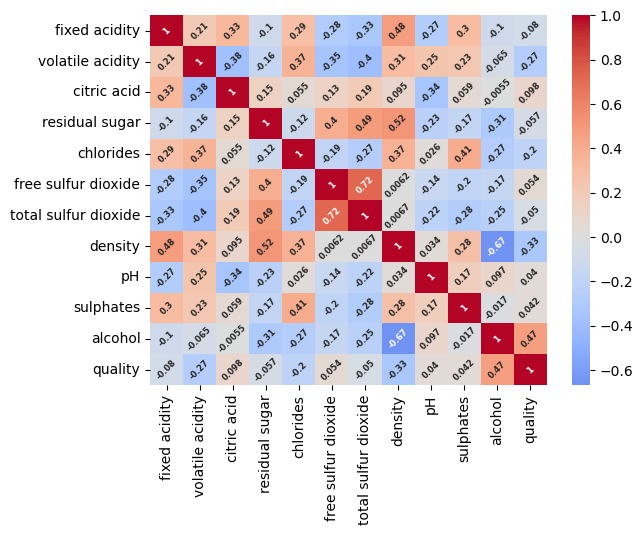

In [17]:
correlation_matrix = wine.corr()

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',\
            center=0, annot_kws={'size': 6, 'fontweight': 'bold', 'rotation': 45})

# Show the plot
plt.show()

Heatmap Observations
--------------------------------
1. Strong negative correlation between alcohol and density
2. Free and total sulfur dioxide are strongly positively correlated
3. White wines have more sulfur dioxide which makes sense as white wines are more prone to oxidation and as sulfur dioxide is used as a form of preservative in wines, there would be a greater presence of them in white wines
4. Red wines have higher volatile acidity due to longer fermenation which leads to higher volatile acid presence 
5. Generally as alcohol content increases, density of wine decreases. The key factor that contributes to the relationship between density and alcohol content is the presence of ethanol (alcohol) in the wine. During the fermentation process, yeast converts sugar in the grape juice into alcohol and carbon dioxide. The alcohol produced is lighter than water, so it reduces the overall density of the wine.

Boxplots
------------

In [18]:
columns_to_plot = wine.drop(['Type', 'quality'], axis=1).columns

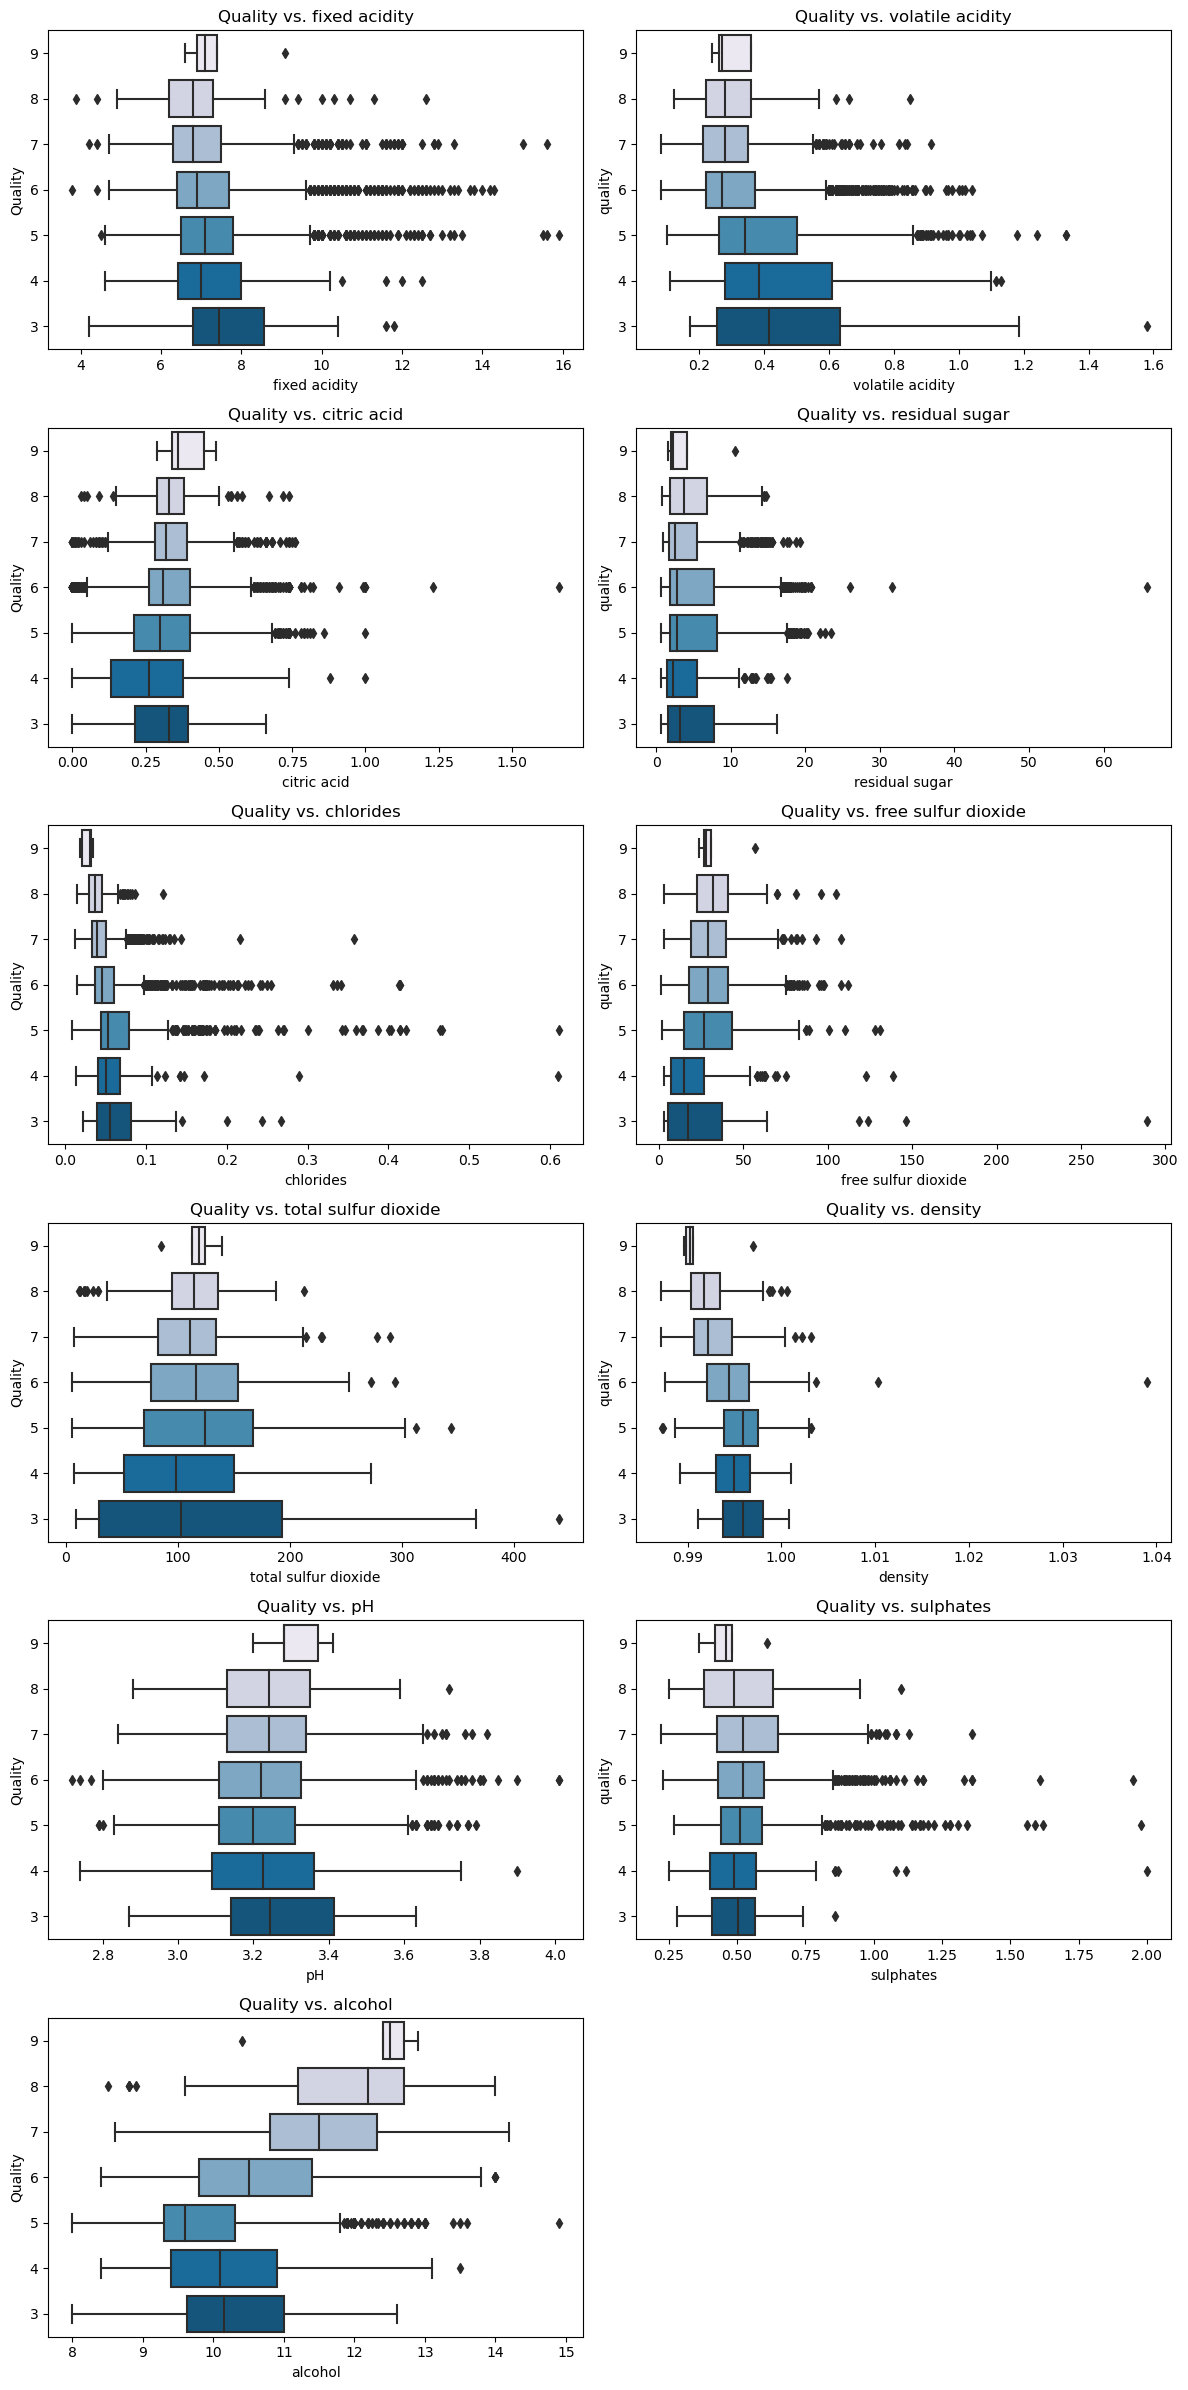

In [19]:
# Define the desired order for the "quality" column (assuming it's a numerical column)
quality_order = sorted(wine['quality'].unique(), reverse=True)

# Calculate the number of rows and columns for the subplots
num_rows = (len(columns_to_plot) + 1) // 2  # Round up to the nearest integer for number of rows
num_cols = min(len(columns_to_plot), 2)  # Maximum of 2 columns per row

# Create a figure with multiple rows and two columns per row
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 4*num_rows), sharey=False)

# Plot horizontal violin plots for 'quality' column against each column in columns_to_plot
for i, column in enumerate(columns_to_plot):
    row = i // num_cols
    col = i % num_cols
    ax = sns.boxplot(x=column, y='quality', data=wine, ax=axes[row, col], orient='h', order=quality_order, palette='PuBu')
    ax.set_title(f'Quality vs. {column}')
    if col == 0:
        ax.set_ylabel('Quality')

# Remove any empty subplots
for i in range(len(columns_to_plot), num_rows * num_cols):
    row = i // num_cols
    col = i % num_cols
    fig.delaxes(axes[row, col])

# Adjust the layout to prevent overlapping titles and y-labels
plt.tight_layout()
# Show the plot
plt.show()

Histograms
----------------

In [20]:
#Import skew function to measure skewness
from scipy.stats import skew

In [21]:
#Skew function to interpret the skew score
def interpret_skewness(skew_value):
    if skew_value < -1:
        return "Highly negatively skewed (left-skewed)"
    elif -1 <= skew_value < -0.5:
        return "Moderately negatively skewed"
    elif -0.5 <= skew_value < -0.1:
        return "Slightly negatively skewed"
    elif -0.1 <= skew_value <= 0.1:
        return "Approximately symmetric distribution"
    elif 0.1 <= skew_value < 0.5:
        return "Slightly positively skewed"
    elif 0.5 <= skew_value < 1:
        return "Moderately positively skewed"
    else:
        return "Highly positively skewed (right-skewed)"

In [22]:
# Create masks for types of wine
mask_w = wine['Type'] == "W"
mask_r = wine['Type'] == "R"

# Get the list of columns in the DataFrame (excluding the 'Type' column)
columns_to_plot = wine.drop(['Type', 'quality'], axis=1).columns

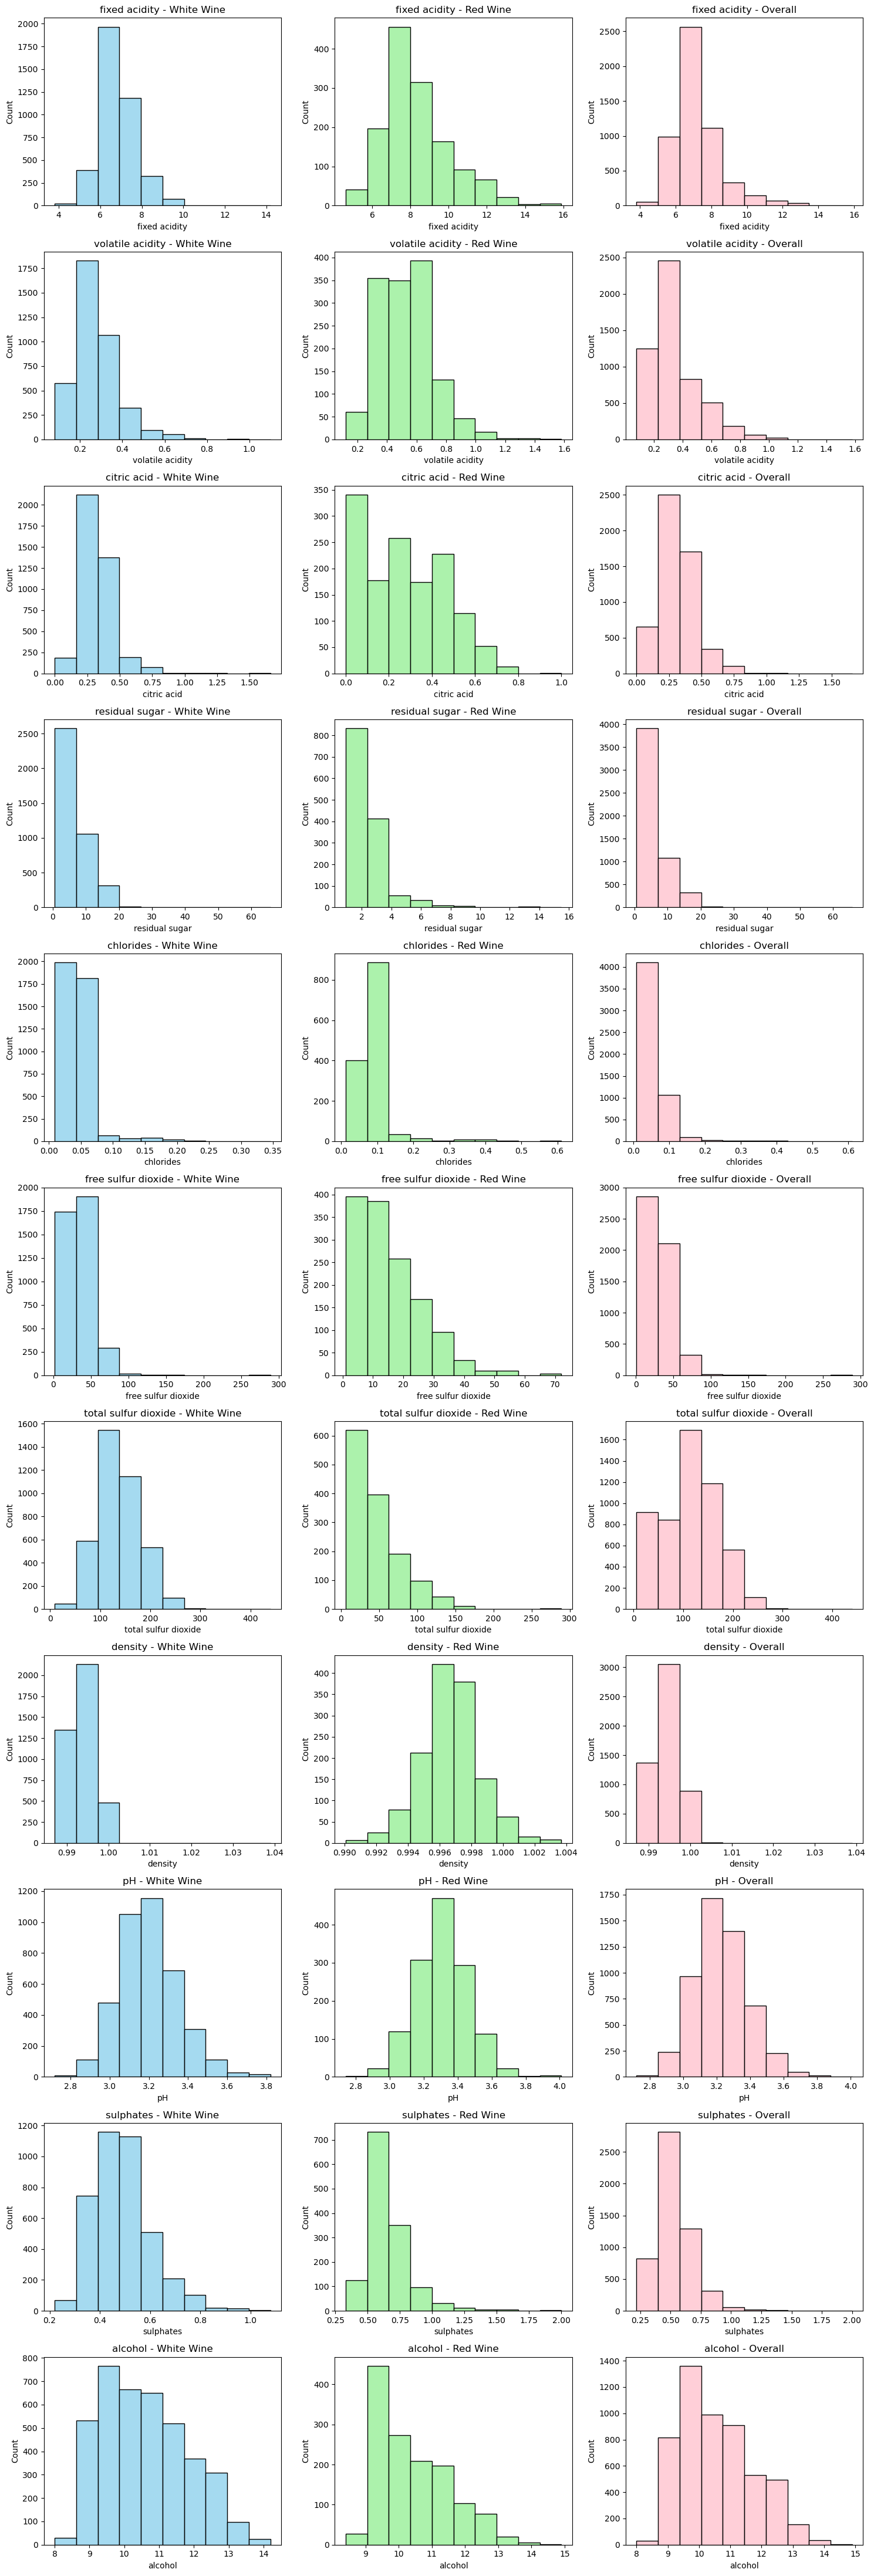

In [23]:
# Create a figure with multiple rows and three columns per row
num_rows = len(columns_to_plot)
fig, axes = plt.subplots(num_rows, 3, figsize=(15, 4*num_rows))

# Plot histograms for each column for white and red wines and overall histograms
for i, column in enumerate(columns_to_plot):
    sns.histplot(wine[mask_w][column], ax=axes[i, 0], color="#87CEEB", bins=10, label='White Wine')
    sns.histplot(wine[mask_r][column], ax=axes[i, 1], color="#90EE90", bins=10, label='Red Wine')
    sns.histplot(wine[column], ax=axes[i, 2], color="#FFC0CB", bins=10)

    axes[i, 0].set_title(f'{column} - White Wine')
    axes[i, 1].set_title(f'{column} - Red Wine')
    axes[i, 2].set_title(f'{column} - Overall')

# Adjust the layout to prevent overlapping titles
plt.tight_layout()

# Show the plot
plt.show()

In [24]:
# Compute and print skewness for each column for white and red wines
for column in columns_to_plot:
    #Calculate the skewness of each graph/column broken up by Wine Type and Overall
    skew_white = skew(wine[mask_w][column])
    skew_red = skew(wine[mask_r][column])
    skew_overall = skew(wine[column])
    
    #Interpret the Skew number
    skew_white_interpretation = interpret_skewness(skew_white)
    skew_red_interpretation = interpret_skewness(skew_red)
    skew_overall_interpretation = interpret_skewness(skew_overall)
    
    #Print results
    print(f"Skewness of White Wine {column}: {round(skew_white, 2)} : {skew_white_interpretation}")
    print(f"Skewness of Red Wine {column}: {round(skew_red, 2)} : {skew_red_interpretation}")
    print(f"Skewness of Overall {column}: {round(skew_overall, 2)} : {skew_overall_interpretation}")
    print(" ")

Skewness of White Wine fixed acidity: 0.7 : Moderately positively skewed
Skewness of Red Wine fixed acidity: 0.94 : Moderately positively skewed
Skewness of Overall fixed acidity: 1.65 : Highly positively skewed (right-skewed)
 
Skewness of White Wine volatile acidity: 1.64 : Highly positively skewed (right-skewed)
Skewness of Red Wine volatile acidity: 0.73 : Moderately positively skewed
Skewness of Overall volatile acidity: 1.5 : Highly positively skewed (right-skewed)
 
Skewness of White Wine citric acid: 1.31 : Highly positively skewed (right-skewed)
Skewness of Red Wine citric acid: 0.31 : Slightly positively skewed
Skewness of Overall citric acid: 0.48 : Slightly positively skewed
 
Skewness of White Wine residual sugar: 1.33 : Highly positively skewed (right-skewed)
Skewness of Red Wine residual sugar: 4.54 : Highly positively skewed (right-skewed)
Skewness of Overall residual sugar: 1.71 : Highly positively skewed (right-skewed)
 
Skewness of White Wine chlorides: 4.97 : Highly

Histogram and Skew Score Observations (Predictor Variables)
----------------------------------------------------------------------------------------
1. We dropped typeand quality because they are categorical variables and we are currently plotting quantitative variables by type and then overall. We will plot **quality** and **type** below
2. Based on the graphs and skew scores above, most columns overall are all positively skewed from moderately to highly positively skewed 
3. In this context, this means that the **mean > median** but the degree to which varies 
4. **Skewness > 1** implies there are **extremely high outlier** that pull the histogram to the **left (right skewed)**
5. Predictors that are **highly skewed**
    - Fixed Acidity
    - Volatile Acidity
    - Residual Sugar
    - Chlorides
    - Free Sulfur Dioxide
    - Sulphates
6. Only **total sulfur dioxide (overall)** has approximately symmetric distribution 

In [25]:
columns_to_plot = wine.drop(wine.columns[[1,2,3,4,5,6,7,8,9,10,11]], axis=1).columns

W    0.74
R    0.26
Name: Type, dtype: float64
6    0.44
5    0.33
7    0.16
4    0.04
8    0.03
3    0.01
9    0.00
Name: quality, dtype: float64


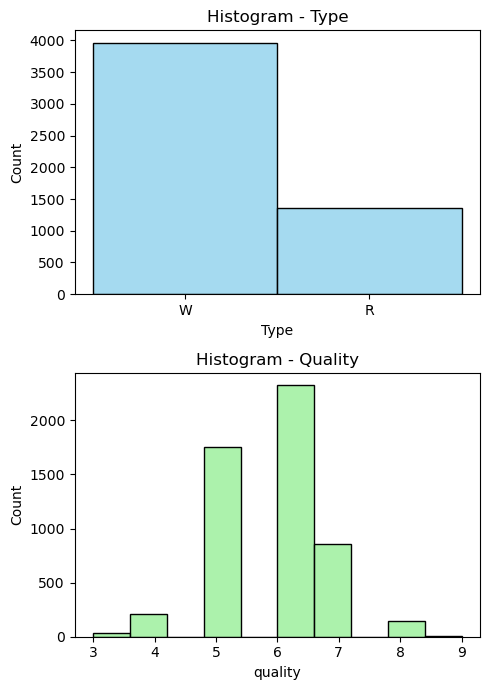

In [26]:
fig, axes = plt.subplots(2, 1, figsize=(5, 7))

# Plot the first histogram on the first subplot
sns.histplot(wine['Type'], ax=axes[0], color="#87CEEB", bins=10)
axes[0].set_title('Histogram - Type')

# Plot the second histogram on the second subplot
sns.histplot(wine['quality'], ax=axes[1], color="#90EE90", bins=10)
axes[1].set_title('Histogram - Quality')

# Adjust the layout to prevent overlapping titles
plt.tight_layout()

#Print the distribution of Type and quality
print(round(wine['Type'].value_counts()/len(wine),2))
print(round(wine['quality'].value_counts()/len(wine),2))

Histogram Observations (Response Variables)
------------------------------------------------------------------
1. 74% of total observations are of white wines
2. 77% of total observations are rated of quality 5 or 6

Based on our results, most of our columns are highly skewed and so we want to reduce skewness to have a more symmetric distribution, before we standardize our values
----------------------

We will now proceed to transform our data

In [27]:
from scipy.stats import boxcox, yeojohnson

In [28]:
#We will test out 3 different transformations and determine which one is the best for each of the columns
wine_skewed_df = wine[['fixed acidity', 'volatile acidity', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'sulphates']]

none_list = []
log_list = []
boxcox_list = []
yeoj_list = []
# Loop through each column and perform transformations
for column in wine_skewed_df.columns:
    # Get the column data as a NumPy array
    column_data = wine_skewed_df[column].values
    #Apply skew score and interpret normally 
    skew_nom = skew(column_data)
    no_skew = interpret_skewness(skew_nom)
    
    # Apply log transformation and calculate skewness
    log_transformed_data = np.log(column_data)
    skew_log = interpret_skewness(skew(log_transformed_data))
    
    # Apply Box-Cox transformation and calculate skewness
    boxcox_transformed_data, lambda_boxcox = boxcox(column_data)
    skew_boxcox = interpret_skewness(skew(boxcox_transformed_data))
    
    # Apply Yeo-Johnson transformation and calculate skewness
    yeojohnson_transformed_data, lambda_yeo = yeojohnson(column_data)
    skew_yeojohnson = interpret_skewness(skew(yeojohnson_transformed_data))
    
    none_list.append(no_skew)
    log_list.append(skew_log)
    boxcox_list.append(skew_boxcox)
    yeoj_list.append(skew_yeojohnson)

transform_dict = {"Before Transformation": none_list ,"Log Transformation" : log_list, "BoxCox Transformation" : boxcox_list, "YeoJohnson List": yeoj_list}
transform_df = pd.DataFrame(transform_dict, index = list(wine_skewed_df.columns))

In [29]:
transform_df

,Before Transformation,Log Transformation,BoxCox Transformation,YeoJohnson List
fixed acidity,Highly positively skewed (right-skewed),Moderately positively skewed,Approximately symmetric distribution,Approximately symmetric distribution
volatile acidity,Highly positively skewed (right-skewed),Slightly positively skewed,Approximately symmetric distribution,Slightly positively skewed
residual sugar,Highly positively skewed (right-skewed),Slightly positively skewed,Approximately symmetric distribution,Slightly positively skewed
chlorides,Highly positively skewed (right-skewed),Moderately positively skewed,Approximately symmetric distribution,Slightly positively skewed
free sulfur dioxide,Highly positively skewed (right-skewed),Moderately negatively skewed,Approximately symmetric distribution,Approximately symmetric distribution
sulphates,Highly positively skewed (right-skewed),Slightly positively skewed,Approximately symmetric distribution,Approximately symmetric distribution


As we can see, for the highly positively skewed columns, BoxCox transformation works the best. So we will proceed with that and make the respective updates for the original wine dataframe and the new dataframe to plot histograms and visualize this change. 

In [30]:
for column in wine_skewed_df.columns:
    # Get the column data as a NumPy array
    column_data = wine_skewed_df[column].values
    
    #Apply same transformation to new df to validate and check the new histogram
    wine_skewed_df[column], lambda_boxcox = boxcox(column_data)
    

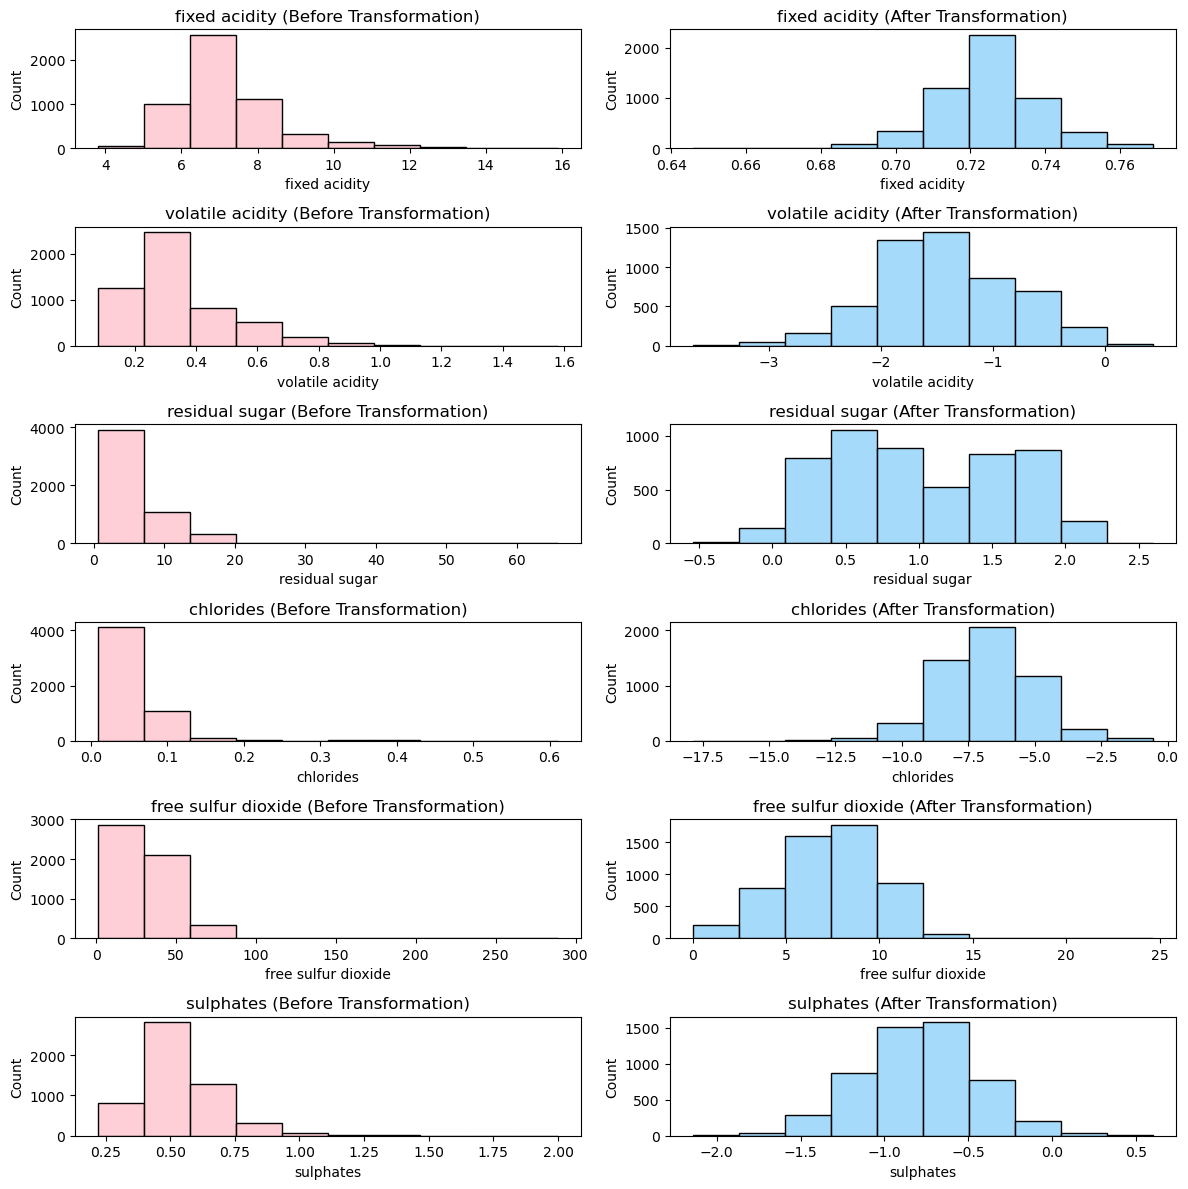

In [31]:
# Get the list of columns in the DataFrame
columns_to_plot = wine_skewed_df.columns

# Create a figure with multiple rows and two columns per row
num_rows = len(columns_to_plot)
fig, axes = plt.subplots(num_rows, 2, figsize=(12, 2*num_rows))

# Plot histograms for each column in wine_skewed_df and wine
for i, column in enumerate(columns_to_plot):
    sns.histplot(wine[column], ax=axes[i, 0], color="#FFC0CB", bins=10)
    sns.histplot(wine_skewed_df[column], ax=axes[i, 1], color="#87CEFA", bins=10)

    # Set titles for the histograms
    axes[i, 0].set_title(f'{column} (Before Transformation)')
    axes[i, 1].set_title(f'{column} (After Transformation)')

# Adjust the layout to prevent overlapping titles
plt.tight_layout()

# Show the plot
plt.show()

## Train Test Split

In [32]:
from sklearn.model_selection import train_test_split
wine_train, wine_test = train_test_split(wine, test_size=0.3,random_state=42)

## Transformations

In [33]:
for column in wine_skewed_df.columns:
    wine_train[column], lambda_boxcox = boxcox(wine_train[column])
    wine_test[column] = boxcox(wine_test[column],lambda_boxcox)

Scale the Data
--------------------

In [34]:
from sklearn.preprocessing import StandardScaler
columns_to_scale = wine.drop(['quality' ,'Type'], axis=1).columns

scaler = StandardScaler()
scaler.fit(wine_train[columns_to_scale])

wine_train[columns_to_scale] = scaler.transform(wine_train[columns_to_scale])
wine_test[columns_to_scale] = scaler.transform(wine_test[columns_to_scale])

Create the Target
-----------------------
Wine quality of greater than 5 is a positive class and 5 or lower is the negative class

In [35]:
wine_train['target'] = 0.0
wine_train['target'][wine_train['quality'] > 5] = 1.0
wine_test['target'] = 0.0
wine_test['target'][wine_test['quality'] > 5] = 1.0

Logistic Regression Model Trial
----------------------

In [36]:
formula = 'target ~ 0 + Q("fixed acidity") + Q("volatile acidity")+ Q("citric acid") + Q("residual sugar") ' + \
           ' + chlorides + Q("free sulfur dioxide") + Q("total sulfur dioxide") + density + pH' + \
            '+ sulphates + alcohol + C(Type) '

In [37]:
Y_train, X_train = dmatrices(formula, wine_train, return_type='dataframe')
y_train = Y_train['target'].values
Y_test, X_test = dmatrices(formula, wine_test, return_type='dataframe')
y_test = Y_test['target'].values

In [38]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)

In [39]:
from sklearn import metrics

prediction_train = model.predict(X_train)
print(metrics.accuracy_score(y_train, prediction_train))

0.7494629430719656


Test Accuracy
------------------

In [40]:
prediction = model.predict(X_test)
print(metrics.accuracy_score(y_test, prediction))

0.7462406015037594


Check for Baseline Accuracy 
-------------------------

In [41]:
# y_train is 0 or 1.
print('Number of positive examples =', len(y_train[y_train==1]))
print('Number of negative examples =', len(y_train[y_train==0]))

Number of positive examples = 2345
Number of negative examples = 1379


In [42]:
positive_examples_in_test = len(y_test[y_test==1])
total_examples_in_test = len(y_test)

print('Number of examples where baseline is correct =', positive_examples_in_test)
print('Baseline accuracy =', positive_examples_in_test * 1.0 / total_examples_in_test)

Number of examples where baseline is correct = 987
Baseline accuracy = 0.618421052631579


Our baseline accuracy is 61% but our Logisitic Test accuracy is 74.6%, but can we improve it? 
-----------------------

In [43]:
weights = pd.Series(model.coef_[0],
                 index=X_train.columns.values)
weights.sort_values()

Q("volatile acidity")       -0.710650
Q("total sulfur dioxide")   -0.498921
C(Type)[W]                  -0.171723
chlorides                   -0.119537
density                     -0.109478
Q("fixed acidity")          -0.046764
pH                           0.062540
Q("citric acid")             0.096350
C(Type)[R]                   0.171962
sulphates                    0.340710
Q("residual sugar")          0.352674
Q("free sulfur dioxide")     0.452119
alcohol                      1.023618
dtype: float64

- Alcohol is the most important factor in determining the quality of the wine...make of that what you will
- Volatile Acidity has the lowest weightage, indicating a decline of quality as volatility increases

Decision Tree Classifier
-------------------------

In [44]:
from sklearn import tree
model2 = tree.DecisionTreeClassifier(criterion='entropy')

In [45]:
result = model2.fit(X_train, y_train)

Train Accuracy

In [46]:
prediction_train = model2.predict(X_train)
print(metrics.accuracy_score(y_train, prediction_train))

1.0


Test Accuracy 
-----------------

In [47]:
prediction = model2.predict(X_test)
print(round(metrics.accuracy_score(y_test, prediction),3))

0.689


Huge drop off in accuracy, clearly we can do better when it comes to a decision tree but will the best version be better than a logistic regression?
-----------------------

In [48]:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [49]:
# Create the folds in the training data
kfold = StratifiedKFold(n_splits=5, shuffle=False)
decision_tree_tracking_df=pd.DataFrame(columns=["Tree Depth","Accuracy Score"])

In [50]:
# Iterate over max_depth
for max_depth in range(2,6):
    #Run Decision Tree for each node
    model3 = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    
    #Calculate the cross val scores based on each fold
    scores = cross_val_score(model3, X_train, y_train, cv=kfold)
    
    #Print the Depth and Avg Accuracy
    print('Depth = {} Accuracy = {}'.format(max_depth, round(scores.mean(),3)))
    
    
    #Append this to a Decision Tree DataFrame
    new_row_df = pd.DataFrame([[max_depth,scores.mean()]], columns=decision_tree_tracking_df.columns)
    decision_tree_tracking_df=decision_tree_tracking_df.append(new_row_df)

Depth = 2 Accuracy = 0.726


Depth = 3 Accuracy = 0.723
Depth = 4 Accuracy = 0.73
Depth = 5 Accuracy = 0.725


In [51]:
#ResetIndex & Choose the Best Depth
decision_tree_tracking_df.reset_index(drop=True,inplace=True)
best_depth = decision_tree_tracking_df.iloc[decision_tree_tracking_df["Accuracy Score"].idxmax()]["Tree Depth"]

#Create Model on Best Depth
model3 = tree.DecisionTreeClassifier(criterion='entropy', max_depth= best_depth)

#Train & Test
model3.fit(X_train, y_train)
y_pred = model3.predict(X_test)

print("\nDecision Trees Test Accuracy - ", round(metrics.accuracy_score(y_test, y_pred),3))


Decision Trees Test Accuracy -  0.738


The best performing accuracy is 73.8% which is slightly worse than our Logistic Regression

## Bagging

In [52]:
# Create a DataFrame to track the results
bagging_tracking_df = pd.DataFrame(columns=["Tree Depth", "Number of Estimators", "Accuracy Score"])

#Run 2 For Loops, one for each node and the other for number of trees
for max_depth in [2,5,10]:
    for n_estimators in [100, 500, 1000]:
            base_estimator = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)

            # Initialize Bagging Classifier with desired parameters
            model_bagging = BaggingClassifier(base_estimator=base_estimator, n_estimators=n_estimators)

            # Use cross-validation to evaluate the model
            scores_bagging = cross_val_score(model_bagging, X_train, y_train, cv=kfold)

            # Calculate and print the average score
            print('Bagging - Depth = {} Trees = {} Accuracy = {}'.format(max_depth, n_estimators, round(scores_bagging.mean(),3)))
            
            #Append the depth, estimator and score to a dataframe column
            new_row_df = pd.DataFrame([[max_depth, n_estimators, scores_bagging.mean()]], columns=bagging_tracking_df.columns)
            bagging_tracking_df = bagging_tracking_df.append(new_row_df)

#Add to file BaggingBestParam
bagging_tracking_df.to_csv("BaggingBestParam.csv")

Bagging - Depth = 2 Trees = 100 Accuracy = 0.73
Bagging - Depth = 2 Trees = 500 Accuracy = 0.729
Bagging - Depth = 2 Trees = 1000 Accuracy = 0.729
Bagging - Depth = 5 Trees = 100 Accuracy = 0.749
Bagging - Depth = 5 Trees = 500 Accuracy = 0.748


KeyboardInterrupt: 

In [ ]:
#We convert the BestParam csv into a df and reset index
bagging_tracking_df=pd.read_csv("BaggingBestParam.csv")
bagging_tracking_df.reset_index(drop=True,inplace=True)

#Pull the best Depth and Trees based on the Accuracy Score
best_depth=int(bagging_tracking_df.iloc[bagging_tracking_df["Accuracy Score"].idxmax()]["Tree Depth"])
best_n=int(bagging_tracking_df.iloc[bagging_tracking_df["Accuracy Score"].idxmax()]["Number of Estimators"])


print('Bagging Classifier best parameters after CV - Depth = {} Trees = {}'.format(best_depth, best_n))

#Create the Base Model
base_estimator = DecisionTreeClassifier(criterion='entropy', max_depth=best_depth)

# Initialize Bagging Classifier with desired parameters
model_bagging = BaggingClassifier(base_estimator=base_estimator, n_estimators=best_n)


#Fit the model and make prediction on test set
model_bagging.fit(X_train, y_train)
y_pred = model_bagging.predict(X_test)

print("Bagging Classifier Test Accuracy - ",round(metrics.accuracy_score(y_test, y_pred),3))

Bagging Classifier best parameters after CV - Depth = 10 Trees = 1000
Bagging Classifier Test Accuracy -  0.773


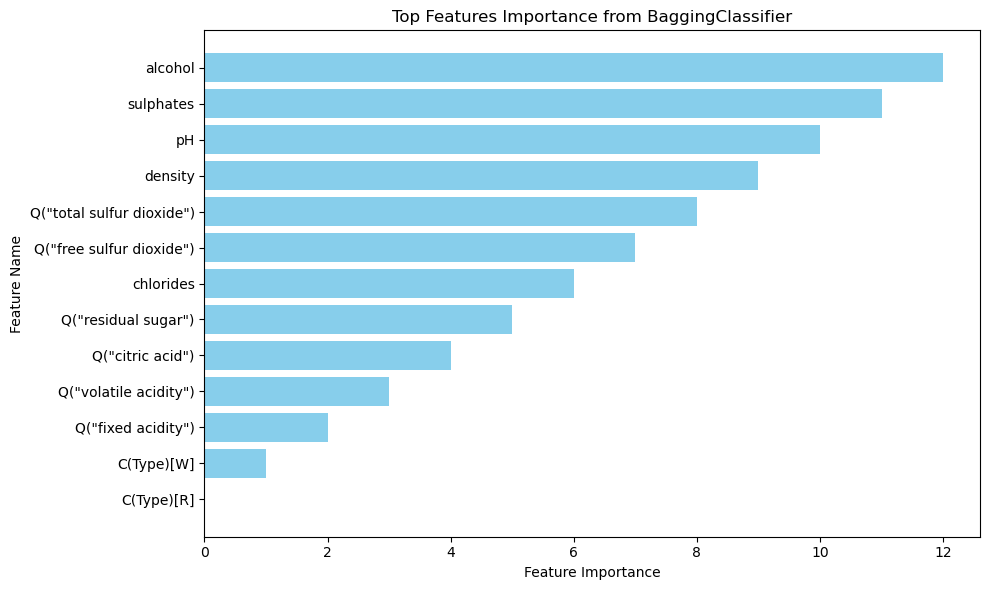

In [ ]:
# Get averaged feature importances from all base estimators
if hasattr(model_bagging, 'estimators_features_'):
    feature_importances = np.array(model_bagging.estimators_features_).mean(axis=0)
else:
    raise ValueError("BaggingClassifier does not have averaged feature importances.")

# Create a DataFrame to hold feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color = "skyblue")
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Top Features Importance from BaggingClassifier')
plt.tight_layout()
plt.show()

## Randomforest

In [ ]:
#Random Forest Tracking DF
RF_tracking_df=pd.DataFrame(columns=["Tree Depth","Number of Trees","Max Features","Accuracy Score"])

#For Loop of Nodes, For Loop of Trees, and Mtry
for max_depth in [2,5,10]:
    for n_estimators in [100,500,1000]:
        for mtry in ["sqrt",5]:
        # Initialize Random Forest Classifier with desired parameters
            model_rf = RandomForestClassifier(n_estimators=n_estimators, criterion='entropy', max_depth=max_depth,max_features=mtry)

            # Use cross-validation to evaluate the model
            scores_rf = cross_val_score(model_rf, X_train, y_train, cv=kfold)

            # Calculate and print the average score
            print('Random Forest - Depth = {} Trees = {} Mtry = {} Accuracy = {}'.format(max_depth, n_estimators,mtry, round(scores_rf.mean(),3)))
            
            #Append to RandomForest DataFrame 
            new_row_df = pd.DataFrame([[max_depth,n_estimators,mtry,scores_rf.mean()]], columns=RF_tracking_df.columns)
            RF_tracking_df=RF_tracking_df.append(new_row_df)
            
RF_tracking_df.to_csv("RFBestParam.csv")

Random Forest - Depth = 2 Trees = 100 Mtry = sqrt Accuracy = 0.704
Random Forest - Depth = 2 Trees = 100 Mtry = 5 Accuracy = 0.728
Random Forest - Depth = 2 Trees = 500 Mtry = sqrt Accuracy = 0.707
Random Forest - Depth = 2 Trees = 500 Mtry = 5 Accuracy = 0.729
Random Forest - Depth = 2 Trees = 1000 Mtry = sqrt Accuracy = 0.705
Random Forest - Depth = 2 Trees = 1000 Mtry = 5 Accuracy = 0.729
Random Forest - Depth = 5 Trees = 100 Mtry = sqrt Accuracy = 0.75
Random Forest - Depth = 5 Trees = 100 Mtry = 5 Accuracy = 0.75
Random Forest - Depth = 5 Trees = 500 Mtry = sqrt Accuracy = 0.749
Random Forest - Depth = 5 Trees = 500 Mtry = 5 Accuracy = 0.747
Random Forest - Depth = 5 Trees = 1000 Mtry = sqrt Accuracy = 0.751
Random Forest - Depth = 5 Trees = 1000 Mtry = 5 Accuracy = 0.748
Random Forest - Depth = 10 Trees = 100 Mtry = sqrt Accuracy = 0.758
Random Forest - Depth = 10 Trees = 100 Mtry = 5 Accuracy = 0.758
Random Forest - Depth = 10 Trees = 500 Mtry = sqrt Accuracy = 0.762
Random Fore

In [ ]:
#Create DF and reset index
RF_tracking_df=pd.read_csv("RFBestParam.csv")
RF_tracking_df.reset_index(drop=True,inplace=True)

#Pull the best node and tree for training accuracy
best_depth=RF_tracking_df.iloc[RF_tracking_df["Accuracy Score"].idxmax()]["Tree Depth"]
best_n=RF_tracking_df.iloc[RF_tracking_df["Accuracy Score"].idxmax()]["Number of Trees"]

#Pull best Mtry
try:
    best_feat=int(RF_tracking_df.iloc[RF_tracking_df["Accuracy Score"].idxmax()]["Max Features"])
except:
    best_feat=RF_tracking_df.iloc[RF_tracking_df["Accuracy Score"].idxmax()]["Max Features"]

In [ ]:
#Print the results
print('Random Forest best parameters after CV - Depth = {} Trees = {} Mtry = {}'.format(best_depth, best_n,best_feat))

#Create the new model with the best features
model_rf = RandomForestClassifier(n_estimators=int(best_n), criterion='entropy',\
 max_depth=int(best_depth),max_features=best_feat)

#Fit the model and predict
model_rf.fit(X_train, y_train)
y_pred = model_rf.predict(X_test)

print("Random Forest Test Accuracy - ", round(metrics.accuracy_score(y_test, y_pred),3))

Random Forest best parameters after CV - Depth = 10 Trees = 500 Mtry = 5
Random Forest Test Accuracy -  0.769


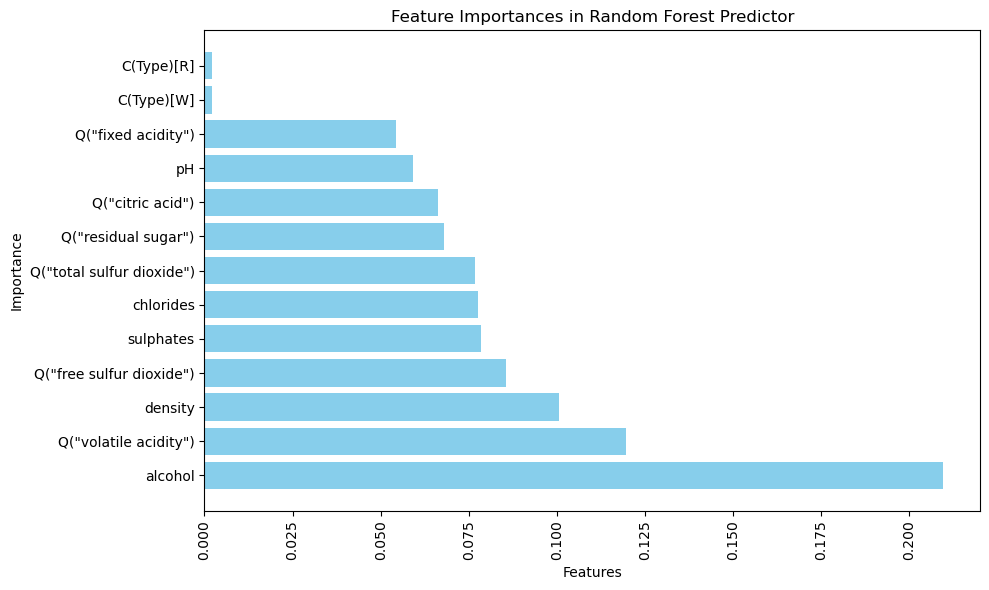

In [ ]:
# Get the feature importances from the fitted model
feature_importances = model_rf.feature_importances_

# Get the column names of the most important features
column_names = X_train.columns[np.argsort(feature_importances)[::-1]]

# Sort the feature importances in descending order
sorted_importances = np.sort(feature_importances)[::-1]

# Plot the feature importances in descending order with column names
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importances)), sorted_importances, tick_label=column_names, color = "skyblue")
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances in Random Forest Predictor')
plt.tight_layout()
plt.show()

## Boosting

In [ ]:
Boost_tracking_df=pd.DataFrame(columns=["Tree Depth","Number of Trees","Shrinkage","Accuracy Score"])

#For loop depth, for loop trees, for loop for shrinkage
for max_depth in [2,5,10]:
    for n_estimators in [100, 500,1000]:
        for shrinkage in [0.1,0.2]:
        # Initialize Random Forest Classifier with desired parameters
            model_boost = GradientBoostingClassifier(max_depth=max_depth,n_estimators=n_estimators,\
                                                     learning_rate=shrinkage)
            # Use cross-validation to evaluate the model
            scores_boost = cross_val_score(model_boost, X_train, y_train, cv=kfold)

            # Calculate and print the average score
            print('Boosting - Depth = {} Trees = {} Shrinkage = {} Accuracy = {}'.format(max_depth, n_estimators,shrinkage, round(scores_boost.mean(),3)))
            
            #Append to Boost Tree Dataframe
            new_row_df = pd.DataFrame([[max_depth,n_estimators,shrinkage,scores_boost.mean()]], columns=Boost_tracking_df.columns)
            Boost_tracking_df=Boost_tracking_df.append(new_row_df)

Boost_tracking_df.to_csv("BoostBestParam.csv")

Boosting - Depth = 2 Trees = 100 Shrinkage = 0.1 Accuracy = 0.756
Boosting - Depth = 2 Trees = 100 Shrinkage = 0.2 Accuracy = 0.759
Boosting - Depth = 2 Trees = 500 Shrinkage = 0.1 Accuracy = 0.749
Boosting - Depth = 2 Trees = 500 Shrinkage = 0.2 Accuracy = 0.745
Boosting - Depth = 2 Trees = 1000 Shrinkage = 0.1 Accuracy = 0.74
Boosting - Depth = 2 Trees = 1000 Shrinkage = 0.2 Accuracy = 0.739
Boosting - Depth = 5 Trees = 100 Shrinkage = 0.1 Accuracy = 0.75
Boosting - Depth = 5 Trees = 100 Shrinkage = 0.2 Accuracy = 0.748
Boosting - Depth = 5 Trees = 500 Shrinkage = 0.1 Accuracy = 0.748
Boosting - Depth = 5 Trees = 500 Shrinkage = 0.2 Accuracy = 0.745
Boosting - Depth = 5 Trees = 1000 Shrinkage = 0.1 Accuracy = 0.748
Boosting - Depth = 5 Trees = 1000 Shrinkage = 0.2 Accuracy = 0.741
Boosting - Depth = 10 Trees = 100 Shrinkage = 0.1 Accuracy = 0.752
Boosting - Depth = 10 Trees = 100 Shrinkage = 0.2 Accuracy = 0.756
Boosting - Depth = 10 Trees = 500 Shrinkage = 0.1 Accuracy = 0.76
Boosti

In [ ]:
#Create df and reset index
Boost_tracking_df=pd.read_csv("BoostBestParam.csv")
Boost_tracking_df.reset_index(drop=True,inplace=True)

#Pull best depth, trees and shirnkage parameter
best_depth=Boost_tracking_df.iloc[Boost_tracking_df["Accuracy Score"].idxmax()]["Tree Depth"]
best_n=Boost_tracking_df.iloc[Boost_tracking_df["Accuracy Score"].idxmax()]["Number of Trees"]
best_shrink=Boost_tracking_df.iloc[Boost_tracking_df["Accuracy Score"].idxmax()]["Shrinkage"]

print('Boosting best parameters - Depth = {} Trees = {} Shrinkage = {}'.format(best_depth, best_n,best_shrink))

#Use best features for the model
model_boost = GradientBoostingClassifier(max_depth=int(best_depth),n_estimators=int(best_n),\
                                             learning_rate=best_shrink)
#Fit result
model_boost.fit(X_train, y_train)
y_pred = model_boost.predict(X_test)

print("Boosting Test Accuracy - ", round(metrics.accuracy_score(y_test, y_pred),3))

Boosting best parameters - Depth = 10.0 Trees = 500.0 Shrinkage = 0.1
Boosting Test Accuracy -  0.778


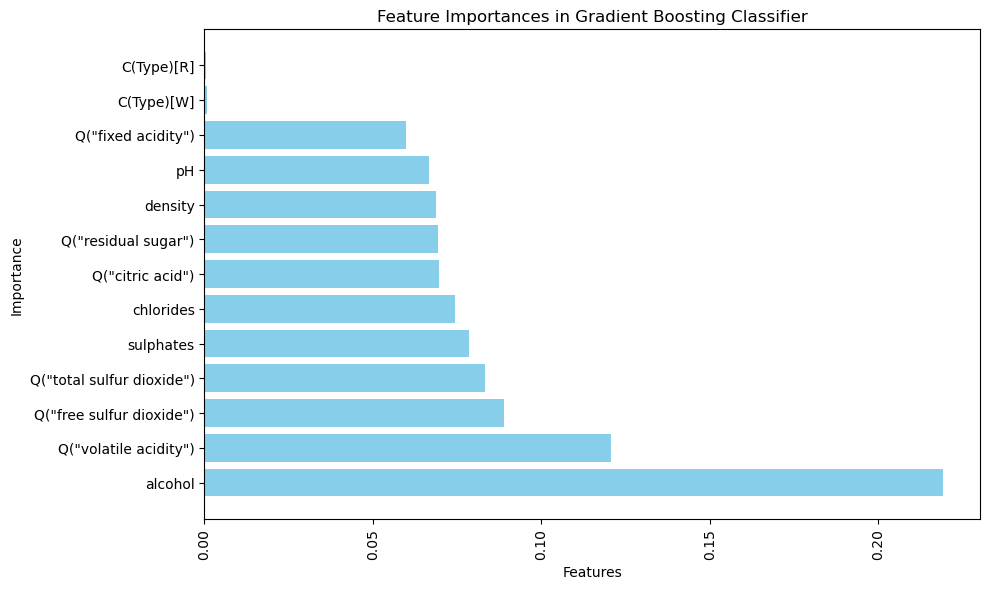

In [ ]:
# Get the feature importances from the fitted model
feature_importances = model_boost.feature_importances_

# Get the column names of the most important features
column_names = X_train.columns[np.argsort(feature_importances)[::-1]]

# Sort the feature importances in descending order
sorted_importances = np.sort(feature_importances)[::-1]

# Plot the feature importances in descending order with column names
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importances)), sorted_importances, tick_label=column_names, color = "skyblue")
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances in Gradient Boosting Classifier')
plt.tight_layout()
plt.show()

Neural Network
------------------


In [54]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.model_selection import StratifiedKFold

In [55]:
Neural_tracking_df = pd.DataFrame(columns=["Hidden Layer Size", "Learning Rate", "Epochs", "Accuracy Score"])

# Convert X and y to tensors
x_tensor = torch.tensor(X_train.to_numpy(), dtype=torch.float32)
y_tensor = torch.tensor(y_train.astype(int), dtype=torch.long)

# Define the k-fold cross-validation
k_folds = 5
skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

for size in [2, 4, 8, 16, 32, 64, 128]:
    for lr in [0.1, 0.01, 0.001]:
        for epochs in [50, 100, 150, 200, 500]:
            # Initialize lists to store accuracy for each fold
            fold_accuracies = []
            
            for fold, (train_index, test_index) in enumerate(skf.split(X_train, y_train)):
                # Split the data into train and test sets for the current fold
                x_train_fold = x_tensor[train_index]
                y_train_fold = y_tensor[train_index]
                x_test_fold = x_tensor[test_index]
                y_test_fold = y_tensor[test_index]
                
                class ClassifierNN(nn.Module):
                    def __init__(self):
                        super(ClassifierNN, self).__init__()
                        self.layer1 = nn.Linear(13, size)  # Adjusted input size to 13
                        self.layer2 = nn.ReLU()
                        self.layer3 = nn.Linear(size, size)  # Output size of layer2 is 64
                        self.layer4 = nn.ReLU()
                        self.layer5 = nn.Linear(size, 2)

                    def forward(self, x):
                        x = self.layer1(x)
                        x = self.layer2(x)
                        x = self.layer3(x)
                        x = self.layer4(x)
                        x = self.layer5(x)
                        return x
                
                # Create the model and optimizer for each fold
                model = ClassifierNN()
                criterion = nn.CrossEntropyLoss()
                optimizer = optim.Adam(model.parameters(), lr=lr)

                # Training
                for epoch in range(epochs):
                    optimizer.zero_grad()
                    predictions = model(x_train_fold)
                    loss = criterion(predictions, y_train_fold)
                    loss.backward()
                    optimizer.step()

                # Evaluate the model on the current fold using the training data
                model.eval()
                with torch.no_grad():
                    test_predictions = model(x_test_fold)

                _, y_pred_test = torch.max(test_predictions, 1)
                correct = (y_pred_test == y_test_fold).sum().item()
                total = y_test_fold.size(0)
                accuracy = correct / total
                
                fold_accuracies.append(accuracy)

                print('Fold {}/{} - Hidden Layer Size = {}, Learning rate = {}, Epochs = {}, Accuracy = {}'.format(fold + 1, k_folds, size, lr, epochs, round(accuracy,3)))
            
            # Calculate the average accuracy across all folds
            avg_accuracy = sum(fold_accuracies) / len(fold_accuracies)

            new_row_df = pd.DataFrame([[size, lr, epochs, avg_accuracy]], columns=Neural_tracking_df.columns)
            Neural_tracking_df = Neural_tracking_df.append(new_row_df)
Neural_tracking_df.to_csv("NNBestParam.csv")

Fold 1/5 - Hidden Layer Size = 2, Learning rate = 0.1, Epochs = 50, Accuracy = 0.756
Fold 2/5 - Hidden Layer Size = 2, Learning rate = 0.1, Epochs = 50, Accuracy = 0.746
Fold 3/5 - Hidden Layer Size = 2, Learning rate = 0.1, Epochs = 50, Accuracy = 0.75
Fold 4/5 - Hidden Layer Size = 2, Learning rate = 0.1, Epochs = 50, Accuracy = 0.732
Fold 5/5 - Hidden Layer Size = 2, Learning rate = 0.1, Epochs = 50, Accuracy = 0.763
Fold 1/5 - Hidden Layer Size = 2, Learning rate = 0.1, Epochs = 100, Accuracy = 0.745
Fold 2/5 - Hidden Layer Size = 2, Learning rate = 0.1, Epochs = 100, Accuracy = 0.63
Fold 3/5 - Hidden Layer Size = 2, Learning rate = 0.1, Epochs = 100, Accuracy = 0.744
Fold 4/5 - Hidden Layer Size = 2, Learning rate = 0.1, Epochs = 100, Accuracy = 0.719
Fold 5/5 - Hidden Layer Size = 2, Learning rate = 0.1, Epochs = 100, Accuracy = 0.63
Fold 1/5 - Hidden Layer Size = 2, Learning rate = 0.1, Epochs = 150, Accuracy = 0.754
Fold 2/5 - Hidden Layer Size = 2, Learning rate = 0.1, Epochs 

In [56]:
Neural_tracking_df=pd.read_csv("NNBestParam.csv")
Neural_tracking_df.reset_index(drop=True,inplace=True)

best_lr=float(Neural_tracking_df.iloc[Neural_tracking_df["Accuracy Score"].idxmax()]["Learning Rate"])
best_layer_size=int(Neural_tracking_df.iloc[Neural_tracking_df["Accuracy Score"].idxmax()]["Hidden Layer Size"])
best_epochs=int(Neural_tracking_df.iloc[Neural_tracking_df["Accuracy Score"].idxmax()]["Epochs"])

In [57]:
class ClassifierNN(nn.Module):
    def __init__(self):
        super(ClassifierNN, self).__init__()
        self.layer1 = nn.Linear(13, best_layer_size)  # Adjusted input size to 13
        self.layer2 = nn.ReLU()
        self.layer3 = nn.Linear(best_layer_size, best_layer_size)  # Output size of layer2 is 64
        self.layer4 = nn.ReLU()
        self.layer5 = nn.Linear(best_layer_size, 2)

    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.layer5(x)
        return x

model = ClassifierNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=best_lr)

# Training
epochs = best_epochs
for epoch in range(epochs):
    optimizer.zero_grad()
    predictions = model(x_tensor)
    loss = criterion(predictions, y_tensor)
    loss.backward()
    optimizer.step()

# Evaluate the model on the current fold using the training data
model.eval()
with torch.no_grad():
    test_predictions = model(torch.tensor(X_test.to_numpy(), dtype=torch.float32))

_, y_pred_test = torch.max(test_predictions, 1)
correct = (y_pred_test == torch.tensor(y_test, dtype=torch.long)).sum().item()  # Convert y_test to a tensor
total = y_test.size
accuracy = correct / total

print('NN Best parameters - Hidden Layer Size={}, Learning rate={}, Epochs={}, Accuracy Score={}'.format( best_layer_size, best_lr, best_epochs, accuracy))

NN Best parameters - Hidden Layer Size=64, Learning rate=0.001, Epochs=150, Accuracy Score=0.7706766917293233
